# Task 5 Loan Acceptance Prediction

## Introduction
Personal loan acceptance prediction using decision trees and data exploration.

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load and inspect the dataset

In [2]:
# Example loading code
df = pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())


Shape: (11162, 17)

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [6]:
# Convert target to binary: 'yes' -> 1, 'no' -> 0
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Verify encoding
print(df_encoded.head())


   age  balance  day  duration  campaign  pdays  previous  deposit  \
0   59     2343    5      1042         1     -1         0        1   
1   56       45    5      1467         1     -1         0        1   
2   41     1270    5      1389         1     -1         0        1   
3   55     2476    5       579         1     -1         0        1   
4   54      184    5       673         2     -1         0        1   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False             False  ...      False      False      False   
3            False             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0       True      False      False      False

## Data Visualization / EDA

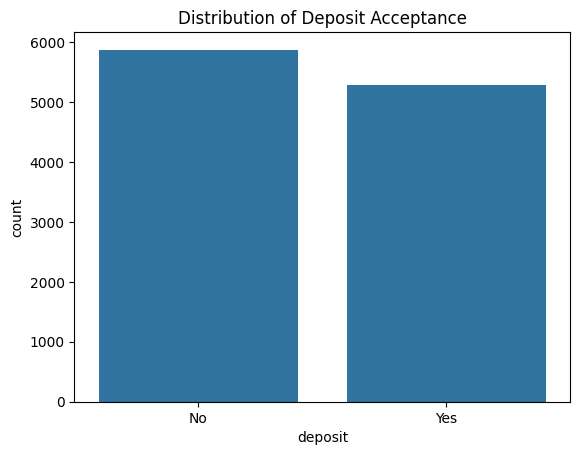

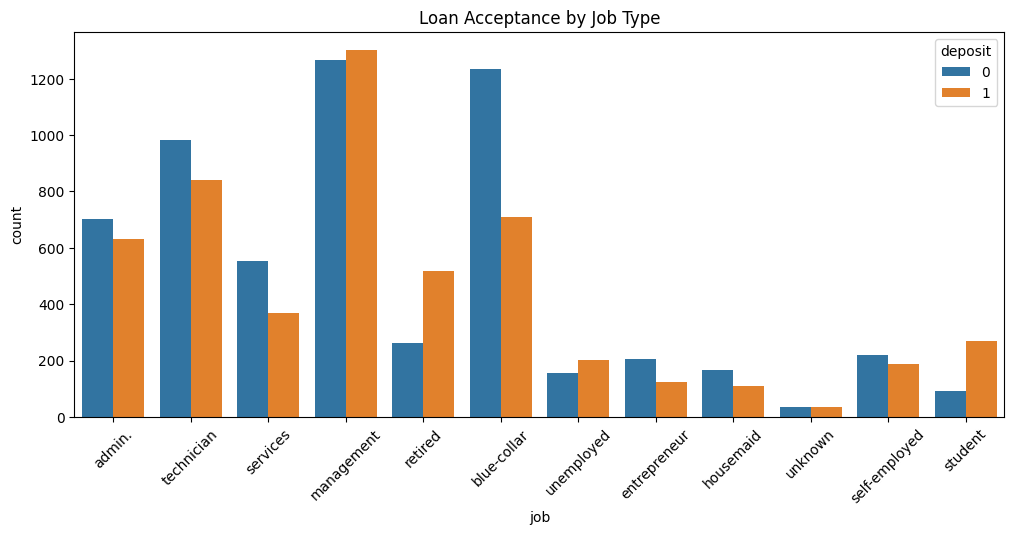

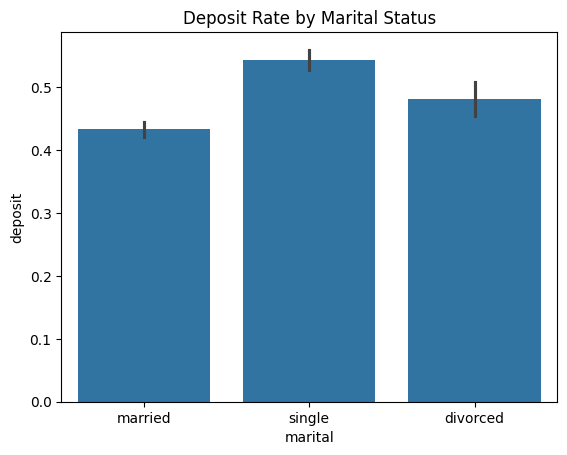

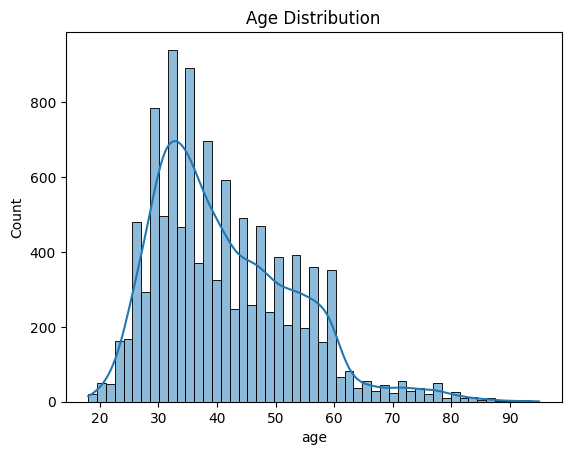

In [7]:
# Distribution of deposit
sns.countplot(x='deposit', data=df)
plt.title("Distribution of Deposit Acceptance")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Job vs Deposit
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='job', hue='deposit')
plt.title("Loan Acceptance by Job Type")
plt.xticks(rotation=45)
plt.show()

# Marital status vs Deposit
sns.barplot(x='marital', y='deposit', data=df)
plt.title("Deposit Rate by Marital Status")
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


## Model Training & Evaluation

In [8]:
# Define features and target
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'])
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7948947604120018
F1 Score: 0.7877664504170528

Confusion Matrix:
 [[925 241]
 [217 850]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1166
           1       0.78      0.80      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



## Conclusion
We explored the Bank Marketing dataset and analyzed customer behavior toward term deposits.

A Decision Tree model was trained and achieved a strong balance between precision and recall.

Job type, poutcome, duration, and previous campaign response were among the most influential features.

This predictive model can help banks personalize and improve marketing efforts to increase deposit conversions.